In [17]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 14 16:59:31 2018

@author: auguste
"""

import numpy as np
import scipy
import matplotlib.pyplot as plt
import re


##################################################
##################################################
##################################################
#   This program read the VASP XDATCAR file in order to operate on ions coordinates
##################################################
##################################################
##################################################








XDATCAR_PATH= '/home/auguste/TEST/IBRION_2/XDATCAR'







##################################################
#   Start reading the number of configuration in XDATCAR file
##################################################
config_number=0
XDATCAR_file = open(XDATCAR_PATH,'r')

for line in XDATCAR_file:
    if re.match("Direct configuration=", line):
        config_number = config_number +1

print('configuration number = ', config_number, ' is ',type(config_number))
print('')
##################################################
#   End reading the number of configuration in XDATCAR file
##################################################







##################################################
#   Start reading informations of the XDATCAR file
##################################################

with open(XDATCAR_PATH,'r') as XDATCAR_file:
    
    ##################################################
    #   Reading first line of the document
    ##################################################
    
    comment_line = str(XDATCAR_file.readline()) 
    
    ##################################################
    #   Reading the lattice parameter which multiply the matrix
    ##################################################
    
    lparam_a = float(XDATCAR_file.readline())
    
    ##################################################
    #   Reading the lattice vectors a,b,c
    ##################################################
    
    cell_vectors= [] #They are lying... In python we must initialised variables... I don't understand why peoples find this easier than fortran... #SadWorld
    for i in range(3):
        cell_vectors.append(np.array(next(XDATCAR_file).split()).astype(float))
        
        #I stop here to comment a bit the program.
        #split() is used to split the readed line into column. Without argument it skip blank space (that is what we want it to do). It also put all the splited colums in an array.
        #next(file) is used to pass to the next output. 
        #That is to say: the current output is the one of the precedent readed line "lparam_a", then with next() we are going to the following outup, thus we get the first line of cell vector, and so on three times, as it is in range(3) for loop.
        #Finally we used .append() to concatenate the three vectors in an array to create a matrix !
        #We hence have floats, in array, in array == matrix
        
    ##################################################
    #   Reading species
    ##################################################
    
    species = XDATCAR_file.readline().split()
    
    ##################################################
    #   Reading the number of element of each species
    ##################################################
    
    species_number = np.array(XDATCAR_file.readline().split()).astype(int)
   
    
    #Counting the number of ions in the system
    ions_number=0
    for i in range(len(species_number)):
        ions_number = ions_number + species_number[i]
    
    ##################################################
    #   Reading the number label of the configuration & ions vector for this configuration
    ##################################################
    
    
    
    
    configuration = []
    for conf in range(config_number):
        configuration_label = np.array(re.findall(r'[\d.]+', XDATCAR_file.readline())).astype(int)
        print('configuration_label= ',configuration_label, ' is ',type(configuration_label[0]))
        print('')
        ions_vectors = []
        for i in range(ions_number):
            ions_vectors.append(np.array(next(XDATCAR_file).split()).astype(float))   
            
        configuration.append(np.array(ions_vectors))
        print('ions_vectors= ',ions_vectors, ' is ',type(ions_vectors))
        print('')
    
    #Example: configuration[2][1,1] is the 3rd configuration, 2nd line, y coordinate
    
    
XDATCAR_file.closed
##################################################
#   End of reading informations of the XDATCAR file
##################################################

print('comment_line= ',comment_line, ' is ',type(comment_line))
print('')
print('lparam_a= ',lparam_a, ' is ',type(lparam_a))
print('')
print('cell_vectors= ',cell_vectors, ' is ',type(cell_vectors))
print('')
print('species= ',species, ' is ',type(species))
print('')
print('species_number= ',species_number, ' is ',type(species_number[0]))
print('')
print('ions_number= ',ions_number, ' is ',type(ions_number))
print('')
#print('configuration_label= ',configuration_label, ' is ',type(configuration_label[0]))
#print('')
#print('ions_vectors= ',ions_vectors, ' is ',type(ions_vectors))
#print('')
print('configuration= ',configuration, ' is ',type(configuration))
print('')



























configuration number =  200  is  <class 'int'>

configuration_label=  [1]  is  <class 'numpy.int64'>

ions_vectors=  [array([0., 0., 0.]), array([0.25, 0.  , 0.  ]), array([0.5, 0. , 0. ]), array([0.75, 0.  , 0.  ]), array([0. , 0.5, 0. ]), array([0.25, 0.5 , 0.  ]), array([0.5, 0.5, 0. ]), array([0.75, 0.5 , 0.  ]), array([0.16666667, 0.33333333, 0.07142857]), array([0.41666667, 0.33333333, 0.07142857]), array([0.66666667, 0.33333333, 0.07142857]), array([0.91666667, 0.33333333, 0.07142857]), array([0.16666667, 0.83333333, 0.07142857]), array([0.41666667, 0.83333333, 0.07142857]), array([0.66666667, 0.83333333, 0.07142857]), array([0.91666667, 0.83333333, 0.07142857]), array([4.3030000e-05, 9.9995697e-01, 1.4314244e-01]), array([0.25004303, 0.99995697, 0.14314244]), array([0.50004303, 0.99995697, 0.14314244]), array([0.75004303, 0.99995697, 0.14314244]), array([4.3030000e-05, 4.9995697e-01, 1.4314244e-01]), array([0.25004303, 0.49995697, 0.14314244]), array([0.50004303, 0.49995697, 0.

ions_vectors=  [array([0., 0., 0.]), array([0.25, 0.  , 0.  ]), array([0.5, 0. , 0. ]), array([0.75, 0.  , 0.  ]), array([0. , 0.5, 0. ]), array([0.25, 0.5 , 0.  ]), array([0.5, 0.5, 0. ]), array([0.75, 0.5 , 0.  ]), array([0.16666667, 0.33333333, 0.07142857]), array([0.41666667, 0.33333333, 0.07142857]), array([0.66666667, 0.33333333, 0.07142857]), array([0.91666667, 0.33333333, 0.07142857]), array([0.16666667, 0.83333333, 0.07142857]), array([0.41666667, 0.83333333, 0.07142857]), array([0.66666667, 0.83333333, 0.07142857]), array([0.91666667, 0.83333333, 0.07142857]), array([0.00139079, 0.99481591, 0.14250171]), array([0.25139079, 0.99481591, 0.14250171]), array([0.50139079, 0.99481591, 0.14250171]), array([0.75139079, 0.99481591, 0.14250171]), array([0.00077117, 0.49795379, 0.14272613]), array([0.25077117, 0.49795379, 0.14272613]), array([0.50077117, 0.49795379, 0.14272613]), array([0.75077117, 0.49795379, 0.14272613]), array([0.16747021, 0.32715616, 0.2132757 ]), array([0.41747021,

ions_vectors=  [array([0., 0., 0.]), array([0.25, 0.  , 0.  ]), array([0.5, 0. , 0. ]), array([0.75, 0.  , 0.  ]), array([0. , 0.5, 0. ]), array([0.25, 0.5 , 0.  ]), array([0.5, 0.5, 0. ]), array([0.75, 0.5 , 0.  ]), array([0.16666667, 0.33333333, 0.07142857]), array([0.41666667, 0.33333333, 0.07142857]), array([0.66666667, 0.33333333, 0.07142857]), array([0.91666667, 0.33333333, 0.07142857]), array([0.16666667, 0.83333333, 0.07142857]), array([0.41666667, 0.83333333, 0.07142857]), array([0.66666667, 0.83333333, 0.07142857]), array([0.91666667, 0.83333333, 0.07142857]), array([6.7378000e-04, 9.9525477e-01, 1.4211166e-01]), array([0.25067378, 0.99525477, 0.14211166]), array([0.50067378, 0.99525477, 0.14211166]), array([0.75067378, 0.99525477, 0.14211166]), array([2.2462000e-04, 4.9670841e-01, 1.4246958e-01]), array([0.25022462, 0.49670841, 0.14246958]), array([0.50022462, 0.49670841, 0.14246958]), array([0.75022462, 0.49670841, 0.14246958]), array([0.16575108, 0.32882834, 0.21303634]), 

ions_vectors=  [array([0., 0., 0.]), array([0.25, 0.  , 0.  ]), array([0.5, 0. , 0. ]), array([0.75, 0.  , 0.  ]), array([0. , 0.5, 0. ]), array([0.25, 0.5 , 0.  ]), array([0.5, 0.5, 0. ]), array([0.75, 0.5 , 0.  ]), array([0.16666667, 0.33333333, 0.07142857]), array([0.41666667, 0.33333333, 0.07142857]), array([0.66666667, 0.33333333, 0.07142857]), array([0.91666667, 0.33333333, 0.07142857]), array([0.16666667, 0.83333333, 0.07142857]), array([0.41666667, 0.83333333, 0.07142857]), array([0.66666667, 0.83333333, 0.07142857]), array([0.91666667, 0.83333333, 0.07142857]), array([-0.00142794,  0.00846273,  0.14205057]), array([0.24857206, 0.00846273, 0.14205057]), array([0.49857206, 0.00846273, 0.14205057]), array([0.74857206, 0.00846273, 0.14205057]), array([-0.00167684,  0.50644877,  0.143393  ]), array([0.24832316, 0.50644877, 0.143393  ]), array([0.49832316, 0.50644877, 0.143393  ]), array([0.74832316, 0.50644877, 0.143393  ]), array([0.15687755, 0.36062907, 0.2140352 ]), array([0.406

ions_vectors=  [array([0., 0., 0.]), array([0.25, 0.  , 0.  ]), array([0.5, 0. , 0. ]), array([0.75, 0.  , 0.  ]), array([0. , 0.5, 0. ]), array([0.25, 0.5 , 0.  ]), array([0.5, 0.5, 0. ]), array([0.75, 0.5 , 0.  ]), array([0.16666667, 0.33333333, 0.07142857]), array([0.41666667, 0.33333333, 0.07142857]), array([0.66666667, 0.33333333, 0.07142857]), array([0.91666667, 0.33333333, 0.07142857]), array([0.16666667, 0.83333333, 0.07142857]), array([0.41666667, 0.83333333, 0.07142857]), array([0.66666667, 0.83333333, 0.07142857]), array([0.91666667, 0.83333333, 0.07142857]), array([-0.00182234,  0.00716853,  0.14177974]), array([0.24817766, 0.00716853, 0.14177974]), array([0.49817766, 0.00716853, 0.14177974]), array([0.74817766, 0.00716853, 0.14177974]), array([-0.00288018,  0.51111435,  0.14196252]), array([0.24711982, 0.51111435, 0.14196252]), array([0.49711982, 0.51111435, 0.14196252]), array([0.74711982, 0.51111435, 0.14196252]), array([0.16155076, 0.35643105, 0.21266433]), array([0.411

ions_vectors=  [array([0., 0., 0.]), array([0.25, 0.  , 0.  ]), array([0.5, 0. , 0. ]), array([0.75, 0.  , 0.  ]), array([0. , 0.5, 0. ]), array([0.25, 0.5 , 0.  ]), array([0.5, 0.5, 0. ]), array([0.75, 0.5 , 0.  ]), array([0.16666667, 0.33333333, 0.07142857]), array([0.41666667, 0.33333333, 0.07142857]), array([0.66666667, 0.33333333, 0.07142857]), array([0.91666667, 0.33333333, 0.07142857]), array([0.16666667, 0.83333333, 0.07142857]), array([0.41666667, 0.83333333, 0.07142857]), array([0.66666667, 0.83333333, 0.07142857]), array([0.91666667, 0.83333333, 0.07142857]), array([ 2.3489000e-04, -8.6810000e-05,  1.4172255e-01]), array([ 2.5023489e-01, -8.6810000e-05,  1.4172255e-01]), array([ 5.0023489e-01, -8.6810000e-05,  1.4172255e-01]), array([ 7.5023489e-01, -8.6810000e-05,  1.4172255e-01]), array([-0.00078925,  0.50346043,  0.14202478]), array([0.24921075, 0.50346043, 0.14202478]), array([0.49921075, 0.50346043, 0.14202478]), array([0.74921075, 0.50346043, 0.14202478]), array([0.165

In [12]:

#Now that data has been loads, we can play with it

##################################################
#   Creating an array of ions' label to later identy them
##################################################


ion_label = []
for i in range(3):
    for j in range(species_number[i]):
        k=j+1
        ion_label.append(species[i]+str(k))
print(ion_label)
        
        
##################################################
#   
##################################################




['Ru1', 'Ru2', 'Ru3', 'Ru4', 'Ru5', 'Ru6', 'Ru7', 'Ru8', 'Ru9', 'Ru10', 'Ru11', 'Ru12', 'Ru13', 'Ru14', 'Ru15', 'Ru16', 'Ru17', 'Ru18', 'Ru19', 'Ru20', 'Ru21', 'Ru22', 'Ru23', 'Ru24', 'Ru25', 'Ru26', 'Ru27', 'Ru28', 'Ru29', 'Ru30', 'Ru31', 'Ru32', 'Ru33', 'Ru34', 'Ru35', 'Ru36', 'Ru37', 'Ru38', 'Ru39', 'Ru40', 'C1', 'C2', 'C3', 'C4', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8']


[0.66770186 0.32264587 0.32587027]
[0.91770186 0.32264587 0.32587027]
0.25
[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 

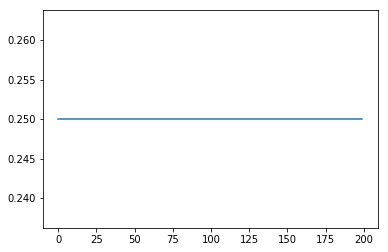

In [32]:
print(configuration[1][50,:])
print(configuration[1][51,:])
print(np.linalg.norm(configuration[i][50,:]-configuration[i][51,:]))
distance = []
for i in range(config_number):
    #print(i)
    distance.append(np.linalg.norm(configuration[i][50,:]-configuration[i][51,:]))
    
print(distance)
plt.plot(range(config_number),distance)

Si on prends deux vecteurs position tel ceux de O_7 et O_8, la norme de la difference de leurs vecteur position reste constante tout le long de la minimisation. Soit je me suis trompé dans ce qu'il me semble être la distance entre les deux vecteurs, soit il y a quelaue chose de très étrange...  